# Ratts Solar

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
#Read CSV File
df=pd.read_csv("Ratts_Irradiance.csv",sep=',')
df.head(2)

,Timestamp,Channel 27_SR30-Irradiance_AVG_W/m^2,Channel 28_SR30-Irradiance-UC_AVG_W/m^2,Channel 34_SR30-Irradiance_AVG_W/m^2,Channel 35_SR30-Irradiance-UC_AVG_W/m^2,Channel 41_SR30-Irradiance_AVG_W/m^2,Channel 42_SR30-Irradiance-UC_AVG_W/m^2
0,2020-06-05 14:51:00,960.2,950.0,958.0,952.5,194.6,192.2
1,2020-06-05 14:52:00,969.3,958.9,967.0,961.3,196.5,194.1


In [114]:
#Update Timestamp as Index.

df.set_index('Timestamp', inplace=True)
df.index = pd.to_datetime(df.index)

#Clean Negative and NAN Values.
df = df.replace(np.nan, 0)
df[df < 0] = 0
#df.to_csv("Test.csv")
df.head(2)

,Channel 27_SR30-Irradiance_AVG_W/m^2,Channel 28_SR30-Irradiance-UC_AVG_W/m^2,Channel 34_SR30-Irradiance_AVG_W/m^2,Channel 35_SR30-Irradiance-UC_AVG_W/m^2,Channel 41_SR30-Irradiance_AVG_W/m^2,Channel 42_SR30-Irradiance-UC_AVG_W/m^2
Timestamp,,,,,,
2020-06-05 14:51:00,960.2,950.0,958.0,952.5,194.6,192.2
2020-06-05 14:52:00,969.3,958.9,967.0,961.3,196.5,194.1


In [115]:
channe1_front = [
    "Channel 27_SR30-Irradiance_AVG_W/m^2",
    "Channel 28_SR30-Irradiance-UC_AVG_W/m^2"
]
channel2_front = [
    "Channel 34_SR30-Irradiance_AVG_W/m^2",
    "Channel 35_SR30-Irradiance-UC_AVG_W/m^2"
]
channel3_back = [
    "Channel 41_SR30-Irradiance_AVG_W/m^2",
    "Channel 42_SR30-Irradiance-UC_AVG_W/m^2"
]

In [116]:
#dff=df.filter(items=['Timestamp','Channel 27_SR30-Irradiance_AVG_W/m^2', 'Channel 28_SR30-Irradiance-UC_AVG_W/m^2','Channel 34_SR30-Irradiance_AVG_W/m^2','Channel 35_SR30-Irradiance-UC_AVG_W/m^2'])
#dfb=df.filter(items=['Timestamp','Channel 41_SR30-Irradiance_AVG_W/m^2','Channel 42_SR30-Irradiance-UC_AVG_W/m^2'])

In [117]:
channel_front = np.append(channe1_front, channel2_front)
channel_back = channel3_back
channel_all = np.append(channel_front, channel_back)

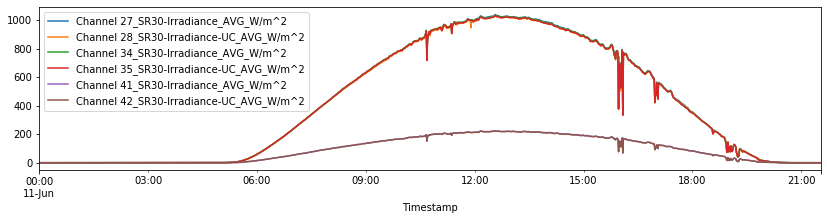

In [118]:
df['2020-06-11'][channel_all].plot(figsize=(14,3))

In [119]:
measured_albedo = df[channel_back].resample('D').sum().mean(axis=1) / df[channel_front].resample('D').sum().mean(axis=1)

#measured_albedo=pd.DataFrame(measured_albedo)
#measured_albedo = measured_albedo.rename(columns={0: 'measured_albedo'})
measured_albedo.head(5)
#measured_albedo.to_csv("measured_albedo ratts.csv")

Timestamp
2020-05-11    0.211088
2020-05-12    0.206090
2020-05-13    0.175714
2020-05-14    0.190799
2020-05-15    0.186841
Freq: D, dtype: float64

In [120]:
solar_gis=pd.read_csv("Albedo_CD_Arevon_RattsISolar_USA.csv",sep=";")

In [121]:
solar_gis.set_index('datetime', inplace=True)
solar_gis.index = pd.to_datetime(solar_gis.index)
solar_gis = solar_gis.replace(-9999, np.nan)
solar_gis = solar_gis.rename(columns={'blue_sky_albedo': 'Solar GIS'})
#solar_gis[solar_gis < 0] = 0
#solar_gis = solar_gis.replace(np.nan, 0)
#solar_gis.head(5)
#solar_gis.to_csv("ratts_test.csv")

In [122]:
result = pd.concat([measured_albedo, solar_gis[measured_albedo.index[0]:measured_albedo.index[-1]]], axis=1, sort=False)
result.to_csv("Ratts_Measured_vs_Satellite.csv")

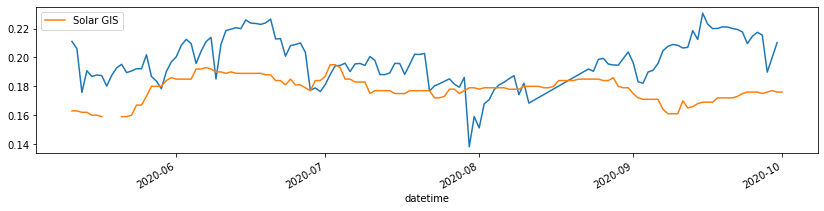

In [123]:
ax = measured_albedo[measured_albedo < 1].plot(figsize=(14,3))
solar_gis[measured_albedo.index[0]:measured_albedo.index[-1]].plot(ax=ax)

0.020844578786090598 0.04615590957981205


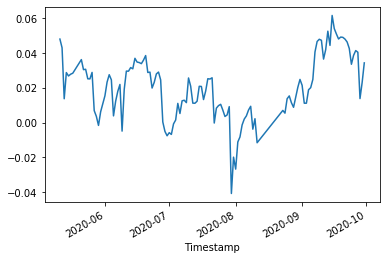

In [124]:
temp = (measured_albedo - solar_gis[measured_albedo.index[0]:measured_albedo.index[-1]]['Solar GIS'])
#temp.to_csv("temp.csv")
print(temp.median(), temp.mean())
temp[temp < .8].plot()